In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

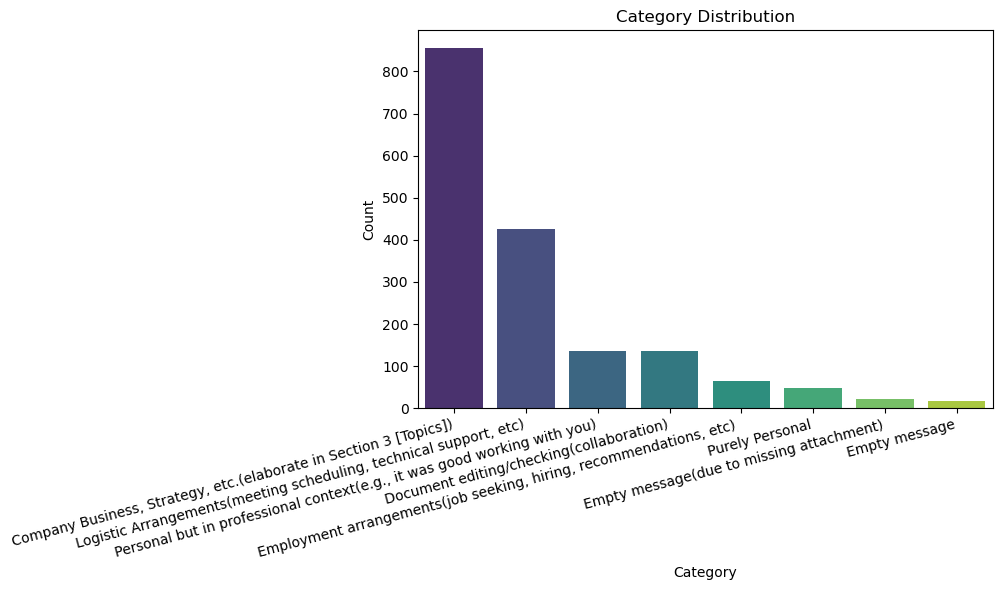

In [2]:
df = pd.read_csv('simplified_labeled_enron.csv')

# Count the frequency of each category under 'label'
label_counts = df['category'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=15, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


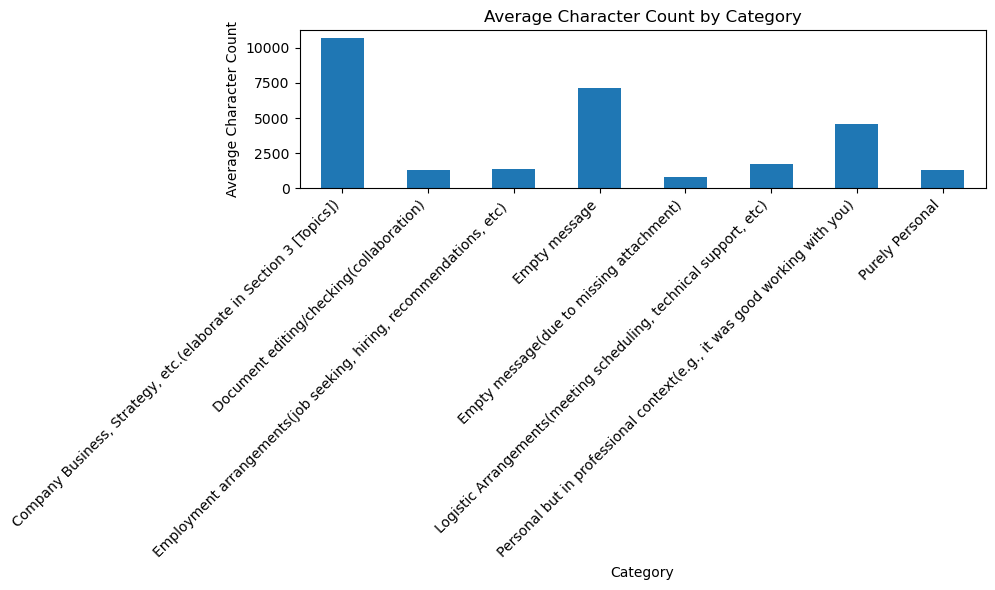

In [3]:
# Calculate the average character count for each category
average_character_count_by_category = df.groupby('category')['body'].apply(lambda x: x.str.len().mean())

# Create a bar plot
plt.figure(figsize=(10, 6))
average_character_count_by_category.plot(kind='bar')
plt.title('Average Character Count by Category')
plt.xlabel('Category')
plt.ylabel('Average Character Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sonic171717/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sonic171717/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
power: 12985
said: 11834
state: 9854
california: 9076
energy: 8633
enron: 7593
would: 5771
electricity: 5712
davis: 4237
gas: 3896


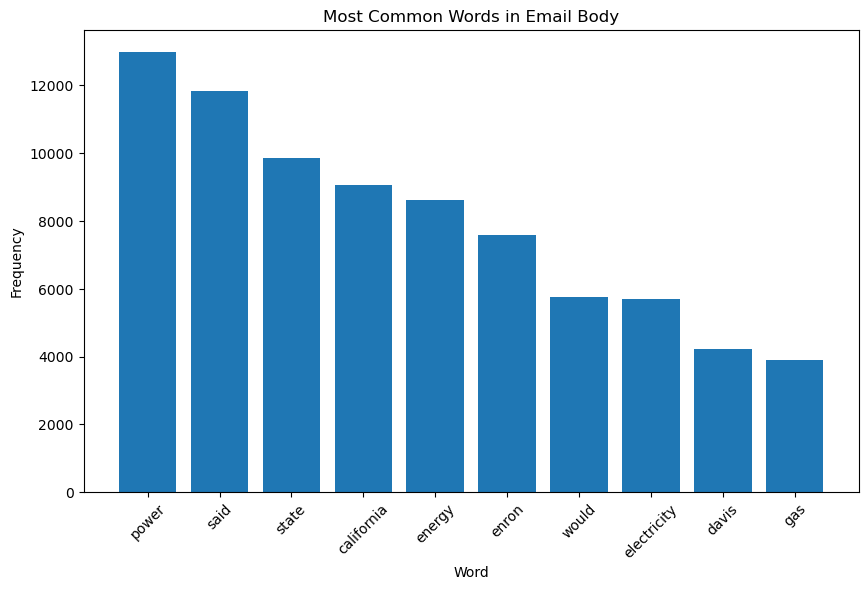

In [4]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Sample text data
text_data = df['body'].dropna()

# Text preprocessing (tokenization, lowercase, stopwords removal)
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Apply preprocessing to the text data
processed_text = text_data.apply(preprocess_text)

# Calculate word frequency
word_frequency = Counter(token for tokens in processed_text for token in tokens)

# Display the most common words
most_common_words = word_frequency.most_common(10)
print("Most Common Words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Create a bar chart of word frequency
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Common Words in Email Body')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [5]:

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load your email data into a DataFrame (replace 'email_data.csv' with your file)
df_all = pd.read_csv('labelled_enron.csv')
df_network = df_all[['from', 'to']]
df_network.rename(columns={'from': 'sender', 'to': 'recipient'}, inplace=True)

# Define a function to extract the email address from the frozenset format
def extract_email(frozenset_str):
    if isinstance(frozenset_str, str):
        return frozenset_str.replace("frozenset({'", "").replace("'})", "")
    else:
        return frozenset_str

# Apply the extraction function to the "sender" and "recipient" columns
df_network['sender'] = df_network['sender'].apply(extract_email)
df_network['recipient'] = df_network['recipient'].apply(extract_email)

# Now, the "sender" columns will contain only the email addresses, but the "recipient" column is still messed up
# for example: matt.smith@enron.com', 'matthew.lenhart@enronon.com

# Define a function to clean and split recipient addresses
def clean_and_split_recipients(recipient_str):
    if isinstance(recipient_str, str):
        # Remove leading and trailing spaces, single quotes, and split by comma
        cleaned_recipients = recipient_str.strip(" '").split("', '")
        return cleaned_recipients
    else:
        return recipient_str

# Apply the cleaning and splitting function to the "recipient" column
df_network['recipient'] = df_network['recipient'].apply(clean_and_split_recipients)

# Now, the "recipient" column will contain lists of cleaned recipient addresses
df_network['recipient']


/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_13364/581917808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network.rename(columns={'from': 'sender', 'to': 'recipient'}, inplace=True)
/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_13364/581917808.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network['sender'] = df_network['sender'].apply(extract_email)
/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_13364/581917808.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

0                                  [todd.burke@enron.com]
1                                  [kim.bolton@enron.com]
2       [matt.smith@enron.com, matthew.lenhart@enron.c...
3       [matt.smith@enron.com, matthew.lenhart@enron.c...
4              [matt.smith@enron.com, m..tholt@enron.com]
                              ...                        
1697    [greg.whalley@enron.com, john.lavorato@enron.c...
1698    [greg.whalley@enron.com, kenneth.lay@enron.com...
1699                               [mark.whitt@enron.com]
1700     [williams@mailman.enron.com, bwillia5@enron.com]
1701                          [scottkuehn@go2netmail.com]
Name: recipient, Length: 1702, dtype: object

In [6]:
# Define a function to clean and split recipient addresses
def clean_and_split_recipients(recipient_str):
    if isinstance(recipient_str, str):
        # Remove leading and trailing spaces, single quotes, and split by comma
        cleaned_recipients = recipient_str.strip(" '").split("', '")
        return cleaned_recipients
    elif isinstance(recipient_str, float) and np.isnan(recipient_str):
        return []  # Handle NaN values by returning an empty list
    else:
        return [str(recipient_str)]  # Convert non-string values to string and return as a single-element list

df_network['recipient']


0                                  [todd.burke@enron.com]
1                                  [kim.bolton@enron.com]
2       [matt.smith@enron.com, matthew.lenhart@enron.c...
3       [matt.smith@enron.com, matthew.lenhart@enron.c...
4              [matt.smith@enron.com, m..tholt@enron.com]
                              ...                        
1697    [greg.whalley@enron.com, john.lavorato@enron.c...
1698    [greg.whalley@enron.com, kenneth.lay@enron.com...
1699                               [mark.whitt@enron.com]
1700     [williams@mailman.enron.com, bwillia5@enron.com]
1701                          [scottkuehn@go2netmail.com]
Name: recipient, Length: 1702, dtype: object

/Users/sonic171717/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


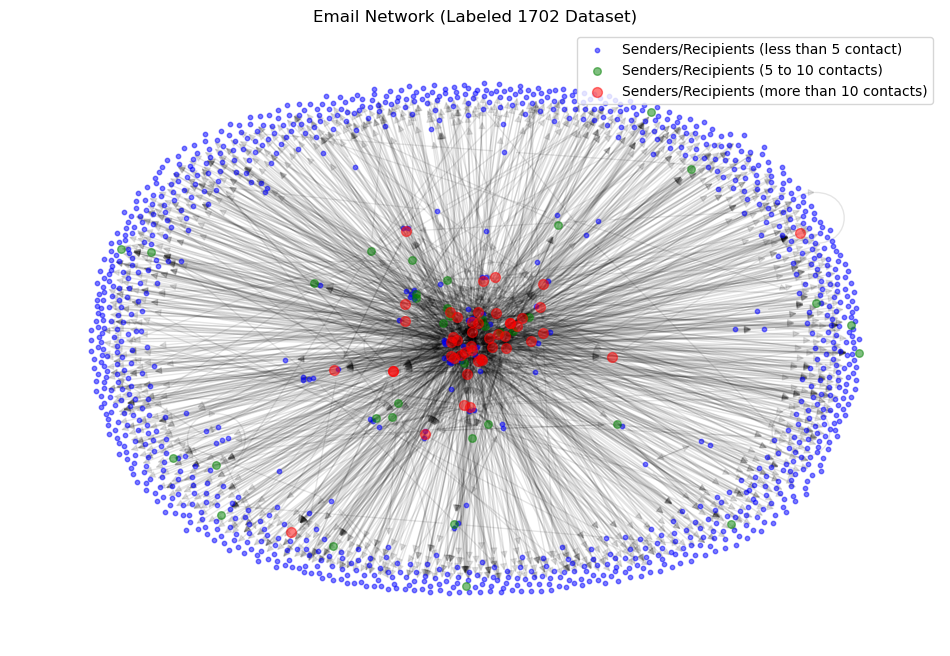

In [7]:
# Define a function to create a graph from the DataFrame
def create_email_network(df):
    G = nx.DiGraph()
    
    # Add edges (senders to recipients)
    for _, row in df.iterrows():
        sender = row['sender']
        recipients = row['recipient']
        
        # Check if recipients is a list and not NaN
        if isinstance(recipients, list):
            # Add sender node
            G.add_node(sender, node_type='sender')
            
            # Add recipient nodes and edges
            for recipient in recipients:
                G.add_node(recipient, node_type='recipient')
                G.add_edge(sender, recipient)
    
    return G

# Create the email network graph using the entire dataset
email_graph = create_email_network(df_network)

# Compute node degrees
node_degrees = dict(email_graph.degree())

# Define node size categories based on degrees
small_size = 10
medium_size = 30
large_size = 50

# Categorize nodes into three different sizes
node_sizes = [small_size if node_degrees[node] <= 5 else (medium_size if node_degrees[node] <= 10 else large_size) for node in email_graph.nodes()]

# Plot the network
plt.figure(figsize=(12, 8))

# Create node lists for senders and recipients
senders = [node for node, data in email_graph.nodes(data=True) if data['node_type'] == 'sender']
recipients = [node for node, data in email_graph.nodes(data=True) if data['node_type'] == 'recipient']

# Draw nodes with categorized sizes
pos = nx.spring_layout(email_graph)  # You can choose a different layout if you prefer

# Draw small-sized nodes
small_nodes = [node for node, size in zip(email_graph.nodes(), node_sizes) if size == small_size]
nx.draw_networkx_nodes(email_graph, pos, nodelist=small_nodes, node_color='b', alpha=0.5, node_size=small_size, label='Senders/Recipients (less than 5 contact)')

# Draw medium-sized nodes
medium_nodes = [node for node, size in zip(email_graph.nodes(), node_sizes) if size == medium_size]
nx.draw_networkx_nodes(email_graph, pos, nodelist=medium_nodes, node_color='g', alpha=0.5, node_size=medium_size, label='Senders/Recipients (5 to 10 contacts)')

# Draw large-sized nodes
large_nodes = [node for node, size in zip(email_graph.nodes(), node_sizes) if size == large_size]
nx.draw_networkx_nodes(email_graph, pos, nodelist=large_nodes, node_color='r', alpha=0.5, node_size=large_size, label='Senders/Recipients (more than 10 contacts)')

# Draw edges
nx.draw_networkx_edges(email_graph, pos, alpha=0.1, arrowsize=10)

# Add legend
plt.legend()

# Show the plot
plt.title('Email Network (Labeled 1702 Dataset)')
plt.axis('off')
plt.show()
